In [1]:
import pandas as pd

In [2]:
label = [ 'H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'N2', 'Ar', 'P', 'T']
in_df = pd.read_csv('input.txt', sep= ' ', header = None)
in_df.columns = label

In [3]:
in_df.head()

,H2,H,O,O2,OH,H2O,HO2,H2O2,N2,Ar,P,T
0,0.258059,0.076098,0.079991,0.406154,0.050154,0.129445,0.000035,0.000065,0.0,0.0,552392.0,2869.0
1,0.293677,0.061413,0.020633,0.406516,0.049569,0.168074,0.000049,0.000070,0.0,0.0,827180.0,1642.0
2,0.222013,0.064561,0.024385,0.557591,0.053823,0.077461,0.000095,0.000071,0.0,0.0,355080.0,2119.0
3,0.251337,0.044486,0.057282,0.414791,0.036133,0.195898,0.000011,0.000062,0.0,0.0,445585.0,2715.0
4,0.345863,0.037831,0.074332,0.318219,0.061714,0.161887,0.000047,0.000106,0.0,0.0,290634.0,1684.0


In [4]:
#make file for first experiment... the first 105 input samples
sub_in_df = in_df.iloc[:105,:]
sub_in_df.shape

(105, 12)

In [5]:
in_df.shape

(197, 12)

In [6]:
sub_in_df.to_csv('input1.txt', index=False)

In [8]:
#separating the output file
with open('out.txt', 'r') as out:
    lines = [ ]
    for line in out:
        #append all non-empty line
        if line != '\n':
            lines.append(line)
        else:
            #if line is empty, we already reach the end of  simulation.
            #simulation index is first in list
            with open(f'./Out_files/out{lines[0].strip()}.txt', 'w') as f:
                #write all aside the first line
                f.writelines(lines[1 : ])
                
            #empty the list
            lines = [ ]

In [9]:
#open on output file
out0_df = pd.read_csv('Out_files/out0.txt', sep= ';', header = None)
label_ = [ 't', 'T', 'H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'N2', 'Ar']
out0_df.columns = label_
out0_df.head()

,t,T,H2,H,O,O2,OH,H2O,HO2,H2O2,N2,Ar
0,0.000000e+00,2869.00,5.97591,1.76221,1.85236,9.40537,1.16142,2.99758,0.000811,0.001505,0,0
1,1.000000e-07,2797.57,2.63168,1.53361,5.38407,5.78586,1.66122,6.20758,0.001057,0.000004,0,0
2,2.000000e-07,2784.98,2.63599,1.55033,5.40746,5.78343,1.64939,6.20081,0.001104,0.000004,0,0
3,3.000000e-07,2777.21,2.63907,1.56083,5.42126,5.78250,1.64204,6.19614,0.001135,0.000004,0,0
4,4.000000e-07,2772.23,2.64102,1.56758,5.43007,5.78193,1.63732,6.19316,0.001154,0.000004,0,0


In [10]:
out0_df.shape

(201, 12)

The output file has 201 timesteps, for now we evaluate classical machine learning techniques to model the first 100 time steps. For the above output file, the input is in the zeroth index of input file

In [12]:
in_df.iloc[0,:-2]

H2      0.258059
H       0.076098
O       0.079991
O2      0.406154
OH      0.050154
H2O     0.129445
HO2     0.000035
H2O2    0.000065
N2      0.000000
Ar      0.000000
Name: 0, dtype: float64

In [13]:
tt = out0_df.iloc[0,2:].sum()
tt

23.157165709999997

In [14]:
(out0_df.iloc[0,2:]/tt).sum()

1.0

<AxesSubplot:xlabel='t', ylabel='O2'>

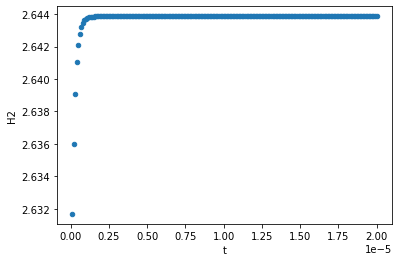

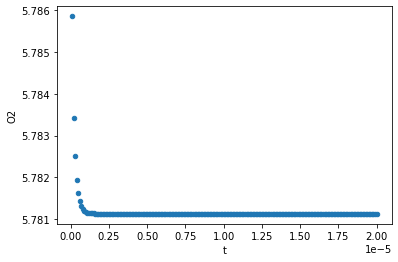

In [36]:
out0_df.iloc[1:,:].plot(kind = 'scatter', x = 't', y = 'H2')
out0_df.iloc[1:,:].plot(kind = 'scatter', x = 't', y = 'O2')

In [49]:
out0_df.describe()

,t,T,H2,H,O,O2,OH,H2O,HO2,H2O2,N2,Ar
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.0,201.0
mean,0.000010,2765.885323,2.660286,1.577872,5.424302,5.799204,1.628473,6.173151,0.001180,0.000011,0.0,0.0
std,0.000006,7.858781,0.235038,0.013637,0.253258,0.255631,0.033220,0.225114,0.000029,0.000106,0.0,0.0
min,0.000000,2764.950000,2.631680,1.533610,1.852360,5.781120,1.161420,2.997580,0.000811,0.000004,0.0,0.0
25%,0.000005,2764.950000,2.643870,1.577520,5.442910,5.781120,1.630410,6.188780,0.001184,0.000004,0.0,0.0
50%,0.000010,2764.950000,2.643870,1.577520,5.442910,5.781120,1.630410,6.188780,0.001184,0.000004,0.0,0.0
75%,0.000015,2764.950000,2.643870,1.577520,5.442910,5.781120,1.630410,6.188780,0.001184,0.000004,0.0,0.0
max,0.000020,2869.000000,5.975910,1.762210,5.442910,9.405370,1.661220,6.207580,0.001184,0.001505,0.0,0.0


In [67]:
out0_df.tail(190).describe()

,t,T,H2,H,O,O2,OH,H2O,HO2,H2O2,N2,Ar
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,1.900000e+02,1.900000e+02,190.0,190.0
mean,0.000011,2764.953158,2.643868,1.577516,5.442904,5.781120,1.630413,6.188782,1.183916e-03,3.794440e-06,0.0,0.0
std,0.000005,0.022432,0.000010,0.000031,0.000041,0.000003,0.000022,0.000015,9.492315e-08,2.045239e-10,0.0,0.0
min,0.000001,2764.950000,2.643770,1.577170,5.442460,5.781120,1.630410,6.188780,1.182880e-03,3.792210e-06,0.0,0.0
25%,0.000006,2764.950000,2.643870,1.577520,5.442910,5.781120,1.630410,6.188780,1.183930e-03,3.794470e-06,0.0,0.0
50%,0.000011,2764.950000,2.643870,1.577520,5.442910,5.781120,1.630410,6.188780,1.183930e-03,3.794470e-06,0.0,0.0
75%,0.000015,2764.950000,2.643870,1.577520,5.442910,5.781120,1.630410,6.188780,1.183930e-03,3.794470e-06,0.0,0.0
max,0.000020,2765.200000,2.643870,1.577520,5.442910,5.781150,1.630660,6.188940,1.183930e-03,3.794470e-06,0.0,0.0


In [69]:
out0_df.head(50).describe()

,t,T,H2,H,O,O2,OH,H2O,HO2,H2O2,N2,Ar
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.0
mean,0.000002,2768.710000,2.709862,1.578937,5.368107,5.853816,1.622622,6.125951,0.001170,0.000034,0.0,0.0
std,0.000001,15.532092,0.471320,0.027522,0.507449,0.512516,0.066768,0.451460,0.000056,0.000212,0.0,0.0
min,0.000000,2764.950000,2.631680,1.533610,1.852360,5.781120,1.161420,2.997580,0.000811,0.000004,0.0,0.0
25%,0.000001,2764.950000,2.643832,1.577405,5.442658,5.781120,1.630410,6.188780,0.001183,0.000004,0.0,0.0
50%,0.000002,2764.950000,2.643870,1.577520,5.442910,5.781120,1.630410,6.188780,0.001184,0.000004,0.0,0.0
75%,0.000004,2765.085000,2.643870,1.577520,5.442910,5.781137,1.630490,6.188835,0.001184,0.000004,0.0,0.0
max,0.000005,2869.000000,5.975910,1.762210,5.442910,9.405370,1.661220,6.207580,0.001184,0.001505,0.0,0.0
